# HW 1

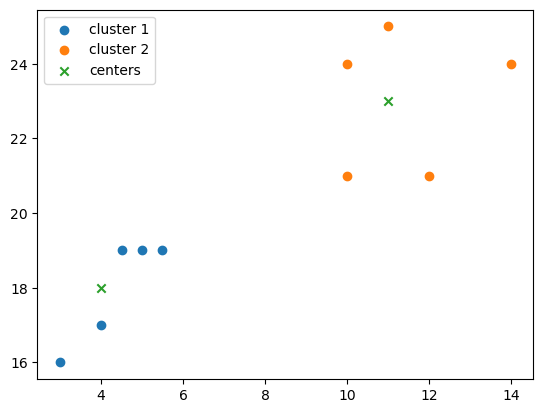

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# creating a single stacked 2d array containing the data
x = [4.5, 5, 10, 4, 3, 11, 14, 5.5, 10, 12]
y = [19, 19, 24, 17, 16, 25, 24, 19, 21, 21]
data = np.array(np.column_stack((x, y)))

K=2 # clusters
tol = 0.001 # minimum difference in centers
n, D = data.shape # extracting dimensions
c = np.array([[5, 18], [12, 23]]) # guesses for centers
c_old = np.zeros(c.shape) # creating array to store deprecated centers
d = np.zeros((K,n)) # creating array to store distances between clusters and centers

while np.abs(c - c_old).sum() > tol: # while distance is significant
    c_old = c.copy() # deprecating the guessed centers
    for i in range(K): # computing the squared distances between centers and clusters
        d[i,:] = np.sum((data - c[:,i].T)**2, 1)
    label = np.argmin(d,0) # assigning the points to the nearest cluster center
    minvals = np.amin(d,0)
    for i in range(K): # recomputing the cluster centers (i.e., centroid)
        c[:,i] = np.mean(data[np.where(label == i),:],1).reshape(1,2)
plt.scatter(data[np.where(label == 0),0], data[np.where(label == 0),1], label='cluster 1')
plt.scatter(data[np.where(label == 1),0], data[np.where(label == 1),1], label='cluster 2')
plt.scatter(c[0], c[1], marker="x", label='centers')
plt.legend()

In [13]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/ionosphere.data', delimiter=',', header=None) # reading the data in
data = data.drop(34, axis = 1) # dropping the label, keeping only the features for pca
K=7 # reduced dimensions
n=data.shape[0] # number of data points
data = data - np.mean(data, axis=0) # centering the data
[U,D2,UT]= np.linalg.svd((data.T @ data)/n) # creating the covariance matrix
new_data = data@U[:,:K]
print(data.shape)
print(new_data.shape)

(351, 34)
(351, 7)


# HW 2

Text(0, 0.5, 'Horsepower')

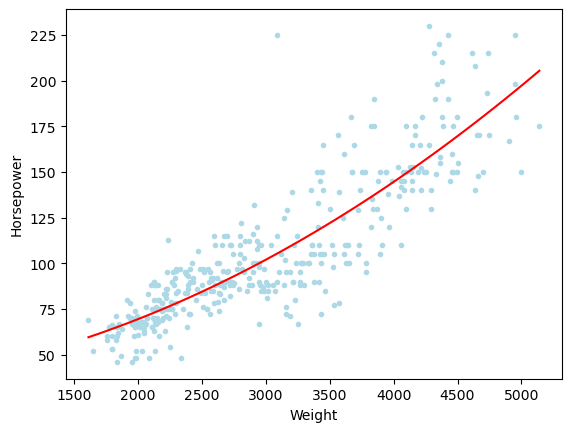

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# loading the datasets
horsepower = np.loadtxt('data/Horsepower.txt')
weight = np.loadtxt('data/Weight.txt')

# creating array to store values of features in a quadratic framework
X = np.ones((len(weight), 3))

for i in range(len(weight)):
    # X[i, 1] term will be 1 for the x^0 term
    X[i,1] = weight[i]    # x term
    X[i,2] = weight[i]**2 # x^2 term

# converting array to matrix form to extract transpose (Y=X^T)
X = np.matrix(X)
Y = np.matrix(horsepower).T

# calculating regression coefficients
beta = np.linalg.solve(X.T*X,X.T*Y)
beta1 = beta[0,0]
beta2 = beta[1,0]
beta3 = beta[2,0]

# creating fitted model / regression line
weight_fitted = np.linspace(np.min(weight), np.max(weight))
horsepower_fitted = beta1 + beta2*weight_fitted + beta3*weight_fitted**2

# plotting results
plt.scatter(weight, horsepower, marker=".", c="lightblue")
plt.plot(weight_fitted, horsepower_fitted, c="red")
plt.xlabel("Weight")
plt.ylabel("Horsepower")

In [7]:
weights_pred = np.array([3000, 4000, 5000])
horsepower_pred = beta1 + beta2 * weights_pred + beta3 * weights_pred**2

In [9]:
# df for better presentation
df_predictions = pd.DataFrame({
    "Weight (lbs)": weights_pred,
    "Predicted Horsepower": horsepower_pred
})

print(df_predictions)

   Weight (lbs)  Predicted Horsepower
0          3000            101.962374
1          4000            144.580997
2          5000            197.270270


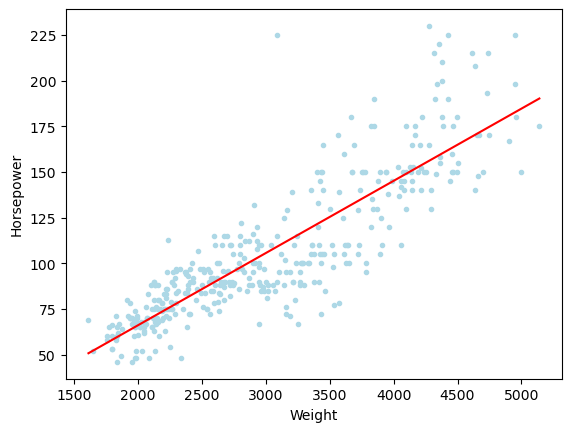

In [10]:
# creating array to store values of features in a linear framework
X_linear = np.ones((len(weight), 2))

for i in range(len(weight)):
    X_linear[i,1] = weight[i]  # x term

# converting array to matrix form to extract transpose (Y=X^T)
X_linear = np.matrix(X_linear)
Y = np.matrix(horsepower).T

# calculating regression coefficients for the linear model
beta_linear = np.linalg.solve(X_linear.T*X_linear, X_linear.T*Y)
beta1_linear = beta_linear[0,0]
beta2_linear = beta_linear[1,0]

# creating fitted model / regression line
weight_fitted_linear = np.linspace(np.min(weight), np.max(weight))
horsepower_fitted_linear = beta1_linear + beta2_linear * weight_fitted_linear

# plotting results
plt.scatter(weight, horsepower, marker=".", c="lightblue")
plt.plot(weight_fitted_linear, horsepower_fitted_linear, c="red")
plt.xlabel("Weight")
plt.ylabel("Horsepower")
plt.show()

In [11]:
weights_pred = np.array([3000, 4000, 5000])
horsepower_pred = beta1_linear + beta2_linear * weights_pred

In [12]:
# df for better presentation
df_predictions = pd.DataFrame({
    "Weight (lbs)": weights_pred,
    "Predicted Horsepower": horsepower_pred
})

print(df_predictions)

   Weight (lbs)  Predicted Horsepower
0          3000            105.613872
1          4000            145.165206
2          5000            184.716540


Text(0, 0.5, 'y')

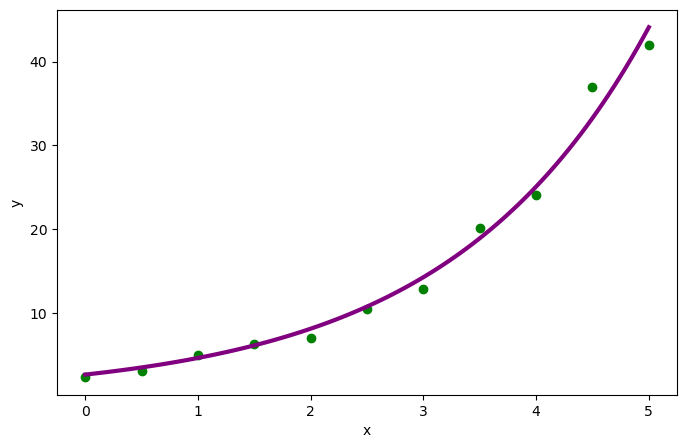

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# data
x_original = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
y_original = np.array([2.3, 3.1, 5.0, 6.3, 7, 10.5, 12.8, 20.1, 24.1, 37, 42])

# defining the exponential function
def exponential(x, Beta_1, Beta_2):
    return Beta_1 * np.exp(Beta_2 * x)

# fitting the exponential function to the data
popt, pcov = curve_fit(exponential, x_original, y_original) # pcov is discarded

# creating a range of x values for plotting the fitted curve
x_fit = np.linspace(min(x_original), max(x_original), 100)

# applying the exponential function with the fitted parameters
y_fit = exponential(x_fit, *popt)

# plotting the original data and the exponential fit
plt.figure(figsize=(8, 5))
plt.plot(x_original, y_original, 'go')
plt.plot(x_fit, y_fit, linewidth=3.0, color='purple')
plt.xlabel('x')
plt.ylabel('y')

In [18]:
# printing the optimal parameters
print(r"Beta_1 = %f, Beta_2 = %f" % (popt[0], popt[1]))

Beta_1 = 2.615060, Beta_2 = 0.565020


# HW 3

In [15]:
import numpy as np
from collections import Counter
import pandas as pd

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1)-np.array(point2))**2))

def knn_predict(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist=euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))
    distances.sort()
    k_nearest_labels=[label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common()[0][0]

data = pd.read_csv('data/ionosphere.data', delimiter=',', header=None)
training_data = data.iloc[:,:-1]
training_labels = data.iloc[:,-1]
